# Lab 2 - Newton basins of attraction
    
In class today we created the function

    def plotNewt(f, x, x0):
    
that takes as input a function $f(x)$ and an initial value $x_0$.  It then creates a plot illustrating Newton's method. 

We noticed for functions like $x^2-2$, $\cos(x)$ and $\sin(x)$ that the root Newton's method finds depends to a large extent on the initial guess $x_0$.  The trend we saw from class was that:

   a) If $x_0$ is close-enough to a root, Newton's method converges very fast to it.

   b) If $x_0$ is relatively far from roots, Newton's method may wander a large amount before settling down to a root.  It can also occasionally fail to find a root.  Mostly this seemed to occur when $x_i$ eventually was outside of the domain of the Newton iterator, and in all the instances we examined this was when $f'(x_i)$ was not defined. 

## Part (A)

For this lab we ask you to make a plot of pairs $(x_0, R(x_0))$ where $x_0$ is an initial value, and $R(x_0)$ is the root Newton's method converges to when given $x_0$ as its initial value. 

As you make progress on this project, you will need to make some decisions.  For example, if Newton's method fails, it perhaps makes the most sense not to plot a point $(x_0, R(x_0))$.  Similarly, you might find the values $R(x_0)$ are too large, so you might need to adjust your scale, or to make some other "off scale" convention. 

Do your plot for the three functions:

$$ (1) \ \ f(x) = x(x-1)(x+1)$$

$$ (2) \ \ f(x) = \sin(x)$$

$$ (3) \ \ f(x) = \cos(x)$$

It perhaps makes sense to just make one routine that takes as input $f(x)$ as well as the $x$-axis interval you would like to perform your plot on.   For (1) make your interval $[-2,2]$.  For (2) make your interval $[-3\pi, 3\pi]$ and for (3) make your interval $[-\pi, \pi]$. 


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline


x = sp.Symbol('x')

def root_find_and_plot(f, x, n, k, a, b):
    domain = linspace(a,b,k)
    
    
    iterator = x - f/f.diff(x)
    
    #make sure that we can input values into sympy expressions
    eval_iterator = sp.lambdify(x, iterator)
    eval_f = sp.lambdify(x, f)
    eval_denominator = sp.lambdify(x, f.diff(x))
    
    converged_roots = [] # our final R(x0) values
    for x0 in domain:
        xi = x0 #xi is for Newton' s method
        
        for i in range(n):
            if eval_denominator(xi) == 0:
                xi = 0
                break
            xi = eval_iterator(xi)
            
        converged_roots.append(xi)
    
    converged_roots = np.asarray(converged_roots)
    
    plt.figure()
    plt.plot(domain, converged_roots, 'o')
    plt.show()
    plt.close()
    
    
    
    

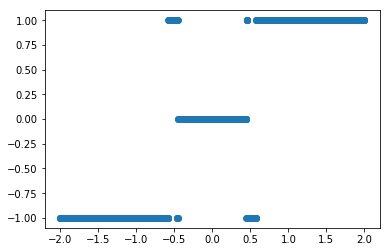

In [2]:
root_find_and_plot(x*(x-1)*(x+1), x, 20, 1500, -2, 2)


## Part (B)

Newton's method works in a wide variety of contexts other than functions of a single real variable.  People also apply it to functions of complex variables to solve complex equations such as $z^8 - z^2 + z - 2 =0$, and for functions of matrix variables to solve equations such as $A^4 - 3A^2 + 2A + I = 0$, where say $A$ is an $n \times n$ matrix. 

Consider applying Newton's method to find the roots of
$$z^3 - 1$$
in the complex plane.  This polynomial factors as
$$z^3 - 1 = (z-1)(z^2 + z + 1) = (z-1)(z-e^\frac{2\pi i}{3})(z-e^{-\frac{2\pi i}{3}})$$
so there are three roots (in the complex plane), and they are:
$$ 1, \ \ e^\frac{2\pi i}{3} = \cos \frac{2 \pi}{3} + i \sin\frac{2\pi}{3}, \ \ e^\frac{-2\pi i}{3} = \cos \frac{2 \pi}{3} - i \sin \frac{2 \pi}{3} $$

We know the roots of this polynomial exactly.  The purpose of this exercise is to plot how the root Newton's method finds depends on our initial guess.

We accomplish the task with a *matplotlib.pyplot.imshow()* plot.

This means will decide how pixels in the image correspond to points in the complex plane. For this plot, let the real and imaginary parts of our complex variable $z$ range through the interval $[-2,2]$, i.e. $z = x+iy$ with $-2 \leq x,y \leq 2$. 

Let's colour the point in the image red, green or blue depending on which of the three roots Newton's method finds. 

Before you begin, notice that our Newton method code from class works perfectly well in this new context.

In [3]:
import sympy as sp

## it is a common convention to call complex variables z, 
z = sp.Symbol('z') ## but you could call it whatever you like.

f = z**3 - 1

N = z - f/f.diff(z)

sp.pprint(N)

F = sp.lambdify(z, f)
IT = sp.lambdify(z, N)

     3    
    z  - 1
z - ──────
        2 
     3⋅z  


In most python libraries, complex floats are given with the notation using "j" for the unit imaginary, i.e. $j^2=-1$.  

In [4]:
print("A complex float: ",0.1+0.3j)

A complex float:  (0.1+0.3j)


In [5]:
## Notice our Newton iterator is totally comfortable with complex numbers, as we would hope!

zi = 1.0+0.5j
for i in range(5):
    ## note also printing formatted complex numbers requires more work!
    print("%1.4f + %1.4fi" % (zi.real, zi.imag) )
    zi = IT(zi)

1.0000 + 0.5000i
0.8267 + 0.1200i
1.0091 + -0.0558i
0.9971 + -0.0012i
1.0000 + 0.0000i


And as we might expect, the Newton iterator, near $1$ converges to $1$.

So your task is to create create a pyplot *imshow()* plot, which colours a pixel red, green or blue depending on which root Newton's method finds.  The pixel corresponds to a complex initial guess $z_0 = x_0 + i y_0$ with $-2 \leq x_0, y_0 \leq 2$.  

Your final image should look something like this:

<img src="Newt.png">

If you complete part (B) with time to spare, create a generalized algorithm:

    basinplot(f, z, roots, rootcol, RMIN, RMAX, IMIN, IMAX, xres, yres)
 
which takes as input:

 - a complex function *f*, for example $f=\cos z$ would be allowed.
 - the variable name, *z*.
 - *roots* will be a list of known zeros of the equation $f(z)=0$.
 - *rootcol* will be another list of the colour you associate to a pixel if Newton's method converges to the corresponding root.
 - In the plot $RMIN \leq Re(z) \leq RMAX$
 - $IMIN \leq Im(z) \leq IMAX$
 - *xres* and *yres* will be the resolution of your image in the x and y directions, respectively. 
 
The *basinplot* function will create an image where pixels in the image correspond to initial guesses $z_0$ for Newton's method.  If Newton's method with initial condition $z_0$ converges to a root from your list *roots*, you colour it with the corresponding colour listed in *rootcol*.  If the root does not appear in the your list, perhaps leave the pixel white or black -- use a colour not *rootcol*.

Perform the plot for the cosine function $\cos(z)$ and the polynomials $z^2 -1$ as well as $z^4 -1$. 

In these examples you might want to use Sympy to find the roots of $\cos(z)$, $z^2-1$ and $z^4-1$. 

In [6]:
##create basin plot from start
## arguments described below

## f ==
##
##rootcol ==numpyarray ( a list of RGB values, one for each root)
##

def basinplot (f, z, roots, rootcol, RMIN, RMAX, IMIN, IMAX, xres, yres):
    ##get iterable Newton method
    N - z- f/f.diff(z)
    DF = sp.lambify(z, f.diff(z), "mpmath")
    IT = sp.lambify()
    